In [9]:
import numpy as np
import cv2

import matplotlib.pyplot as plt

face_cascade = cv2.CascadeClassifier('/usr/local/share/OpenCV/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/usr/local/share/OpenCV/haarcascades/haarcascade_eye.xml')
 
img = cv2.imread('/home/jonnatas/Imagens/gg.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# display plots in this notebook
%matplotlib inline

In [10]:
def detect(frame):
    height, width, depth = frame.shape

    # create grayscale version
    grayscale = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
 
    # equalize histogram
    cv2.equalizeHist(grayscale, grayscale)

    # detect objects
    classifier = cv2.CascadeClassifier("usr/local/share/OpenCV/haarcascades/haarcascade_frontalface_alt2.xml")
    DOWNSCALE = 4
    minisize = (frame.shape[1]/DOWNSCALE,frame.shape[0]/DOWNSCALE)
    miniframe = cv2.resize(frame, minisize)
    faces = classifier.detectMultiScale(miniframe)
    if len(faces)>0:
        # print 'face detected!'
        for i in faces:
            x, y, w, h = [ v*DOWNSCALE for v in i ]
            cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0))
    return frame

In [12]:
cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    if frame is None:
        break
    img = frame.copy()
    # Call the function
    frame = detect(frame)

    # Display the resulting frame
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

In [13]:
plt.imshow(frame[:,:,::-1])
plt.title('Detection result')
plt.axis('off')

TypeError: 'NoneType' object has no attribute '__getitem__'

(-0.5, 639.5, 479.5, -0.5)

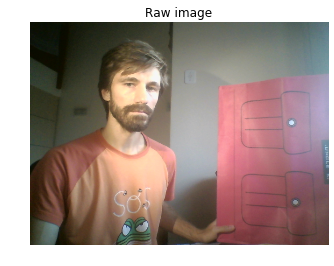

In [46]:
img = img[:,:,::-1] # Converting from BGR (OpenCV) to RGB (standard)
plt.imshow(img)
plt.title('Raw image')
plt.axis('off')

In [47]:
img.mean()

114.38324544270833

In [48]:
img.std()

56.154092496009881

In [49]:
hist = np.histogram(img)
for l in hist: 
    print l

[ 45122  85759 133967 129027 141241 142903 124317  67649  23846  27769]
[   0.    25.5   51.    76.5  102.   127.5  153.   178.5  204.   229.5
  255. ]


<Container object of 10 artists>

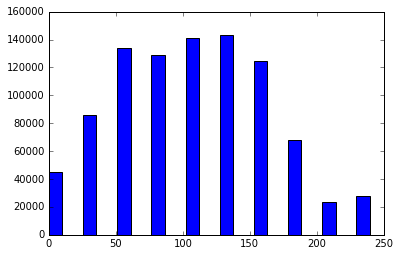

In [50]:
plt.bar(hist[1][:-1], hist[0], 10) # counts, x-axis

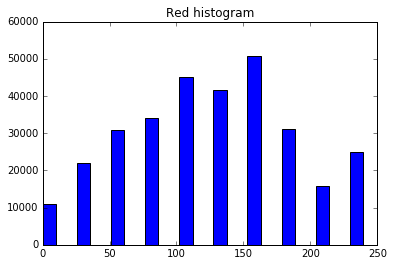

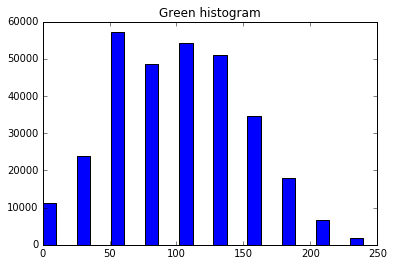

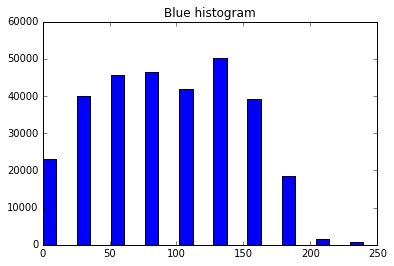

In [51]:
hist_red  = np.histogram(img[:,:,0], hist[1]) # using the same x-axis as the general histogram (hist[1])
hist_green  = np.histogram(img[:,:,1], hist[1])
hist_blue  = np.histogram(img[:,:,2], hist[1])

plt.figure()
plt.bar(hist[1][:-1], hist_red[0], 10)
plt.title('Red histogram')
plt.figure()
plt.bar(hist[1][:-1], hist_green[0], 10)
plt.title('Green histogram')
plt.figure()
plt.bar(hist[1][:-1], hist_blue[0], 10)
plt.title('Blue histogram')

In [52]:
np.hstack((hist_red[0],hist_blue[0],hist_green[0]))

array([10848, 21908, 30974, 34112, 45034, 41739, 50646, 31168, 15719,
       25052, 23123, 39875, 45755, 46361, 41917, 50217, 39143, 18442,
        1529,   838, 11151, 23976, 57238, 48554, 54290, 50947, 34528,
       18039,  6598,  1879])

In [53]:
640*480*3

921600

In [54]:
hist_red

(array([10848, 21908, 30974, 34112, 45034, 41739, 50646, 31168, 15719, 25052]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]))

In [55]:
hist

(array([ 45122,  85759, 133967, 129027, 141241, 142903, 124317,  67649,
         23846,  27769]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]))